# Market Analysis

Instruments to trade: 0, 1, 2, 3, 4, 5, 6, 7, 22, 23, 24, 26, 27

---

We can first start by plotting all the instrument's price data to get a general overview

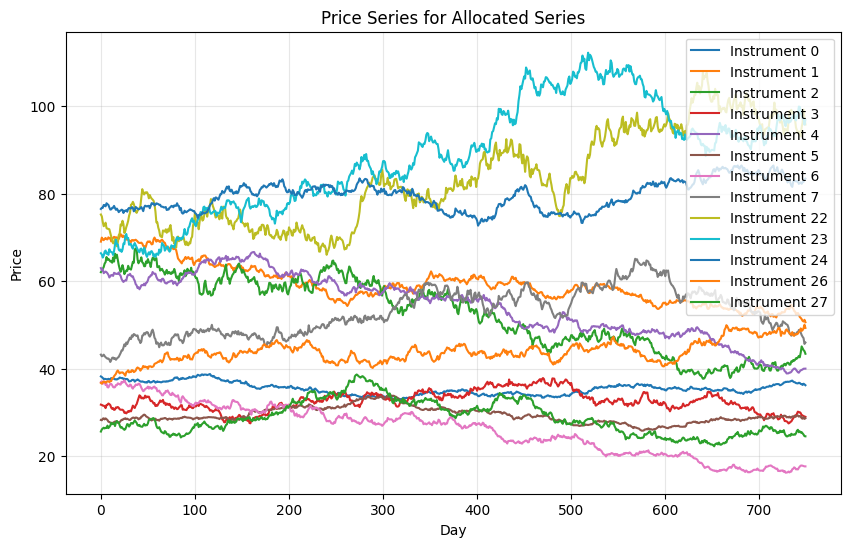

In [18]:
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
from numpy import ndarray
from typing import List
import numpy as np

prices_filepath: str = "../prices.txt"
start_day: int = 0
end_day: int = 750
instrument_nos: List[int] = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23, 24, 26, 27]

def plot_price_data_all() -> None:
    # Read the csv
    raw_prices: DataFrame = pd.read_csv(prices_filepath, sep=r"\s+", header=None)
    raw_prices.index.name = "day"
    raw_prices.columns = raw_prices.columns.astype(int)
    
    my_instruments: DataFrame = raw_prices[instrument_nos]
    
    plt.figure(figsize=(10,6))
    for instrument in instrument_nos:
        plt.plot(my_instruments.index, my_instruments[instrument], label=f"Instrument {instrument}")
        
    plt.xlabel("Day")
    plt.ylabel("Price")
    plt.title("Price Series for Allocated Series")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_price_data_all()

We now do an analysis over all the instruments.

In [3]:
from analysis import MarketData
prices_filepath: str = "../prices.txt"

market_data = MarketData(0, 749, prices_filepath)

# Instrument 0 Analysis

---

We plot instrument 0's price data, volatility and returns distribution

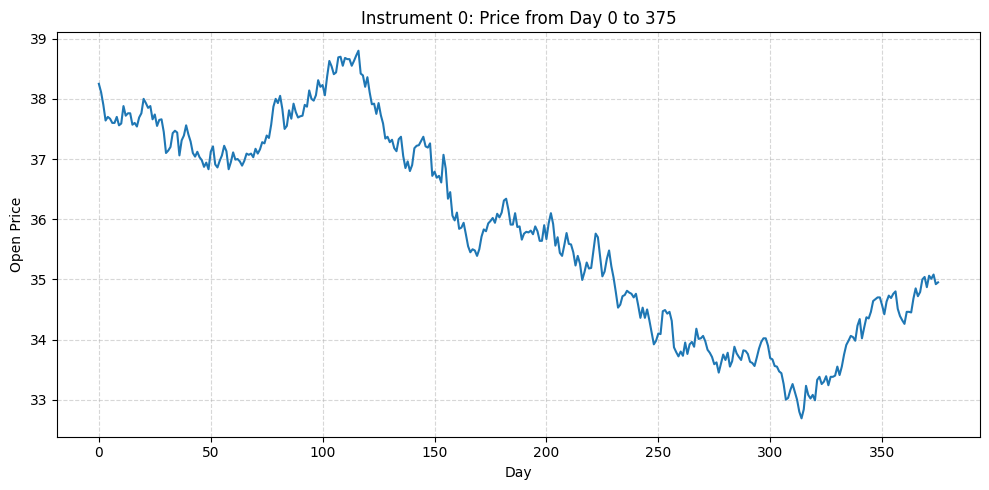

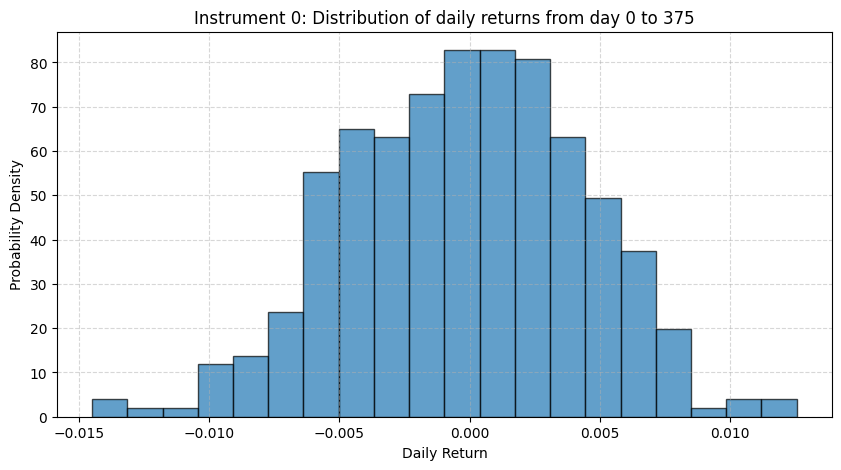

In [13]:
from analysis import (SHORT_TERM_STDDEV_LOOKBACK,MONTHLY_STDDEV_LOOKBACK, 
                      QUARTERLY_STDDEV_LOOKBACK, YEARLY_STDDEV_LOOKBACK)

market_data.plot_instrument_price_data(0, 0, 375)

market_data.plot_instrument_returns_distribution(0, 0, 375)

This instrument shows momentum/trading behaviour. We can plot moving averages to see if trends 
persist as well as autocorrelation

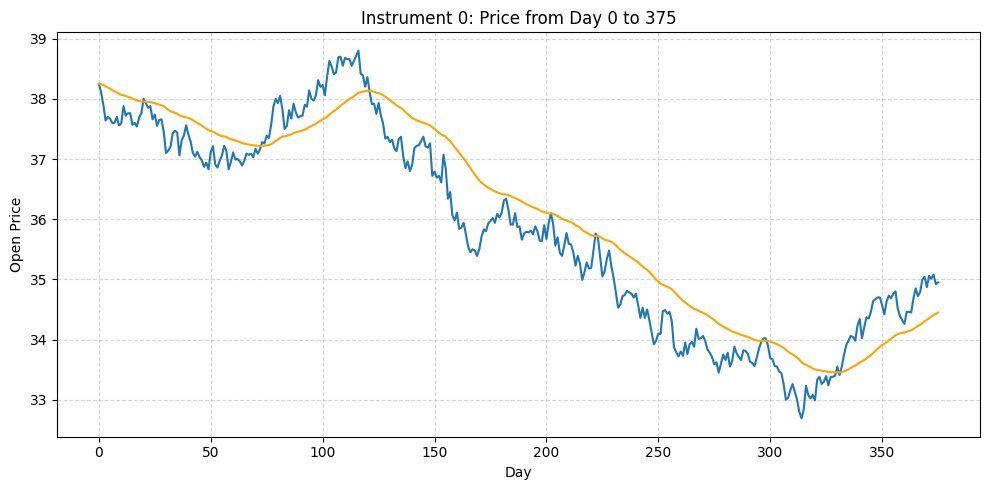

In [19]:
from analysis import PricePlotOptions

options: PricePlotOptions = PricePlotOptions()
options["moving_average"] = 'exponential'
options["moving_average_periods"] = 50

market_data.plot_instrument_price_data(0, 0, 375, options)